<a href="https://colab.research.google.com/github/tamisha-dzifa/DSProject2/blob/master/Project_2_Data_Inventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import os

if not os.path.exists('suicide-death-rates.csv'):
  !wget https://github.com/tamisha-dzifa/DSProject2/raw/master/suicide-death-rates.csv

--2020-11-17 19:21:58--  https://github.com/tamisha-dzifa/DSProject2/raw/master/suicide-death-rates.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/suicide-death-rates.csv [following]
--2020-11-17 19:21:58--  https://raw.githubusercontent.com/tamisha-dzifa/DSProject2/master/suicide-death-rates.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 245130 (239K) [text/plain]
Saving to: ‘suicide-death-rates.csv’

suicide-death-rates 100%[===================>] 239.38K  --.-KB/s    in 0.06s   

2020-11-17 19:21:58 (4.16 MB/s) - ‘suicide-death-rates.csv’ saved [245130/2451

In [4]:
suicide = pd.read_csv('suicide-death-rates.csv')
suicide.head()

,Entity,Code,Year,Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


Renaming the last column as `Suicide Rate`.

In [6]:
suicide.columns = ['Entity', 'Code', 'Year', 'Suicide Rate']
suicide.head()

,Entity,Code,Year,Suicide Rate
0,Afghanistan,AFG,1990,10.318504
1,Afghanistan,AFG,1991,10.327010
2,Afghanistan,AFG,1992,10.271411
3,Afghanistan,AFG,1993,10.376123
4,Afghanistan,AFG,1994,10.575915


In [9]:
suicide.shape

(6468, 4)

In [14]:
suicide_entity = suicide['Entity']
suicide_entity.value_counts().sort_index()

Afghanistan                   28
Albania                       28
Algeria                       28
American Samoa                28
Andean Latin America          28
                              ..
Western Sub-Saharan Africa    28
World                         28
Yemen                         28
Zambia                        28
Zimbabwe                      28
Name: Entity, Length: 231, dtype: int64

In [15]:
suicide_entity.isna().sum()

0

In [16]:
suicide['Suicide Rate'].isna().sum()

0

There are no N/A values which is good.

In [17]:
s_rate = suicide['Suicide Rate']
s_rate.describe()

count    6468.000000
mean       12.068240
std         8.037739
min         1.526792
25%         6.741737
50%        10.668531
75%        14.742472
max        98.831696
Name: Suicide Rate, dtype: float64

In [18]:
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.3.9-cp36-none-any.whl size=10157 sha256=1014bae4cd591b977b8d99bfbd709b082176890da203cb60a37e78bee67b6c5d
  Stored in directory: /root/.cache/pip/wheels/bf/70/8c/55788f5a5806e6da295e5da80d2c0ef286d9a8260a1e3142e1
Successfully built empiricaldist


In [27]:
from empiricaldist import Pmf, Cdf
s_rate_cdf = Cdf.from_seq(s_rate)

In [28]:
import matplotlib.pyplot as plt

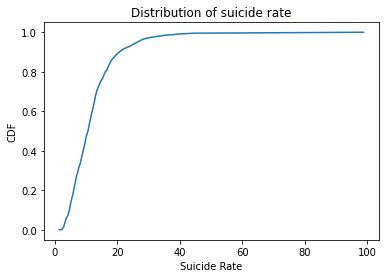

In [31]:
s_rate_cdf.plot()
plt.xlabel('Suicide Rate');
plt.ylabel('CDF');
plt.title('Distribution of suicide rate');

In [32]:
q = 30
p = s_rate_cdf(q)
p

array(0.97139765)

From the CDF above, we can say that from the suicide rates presented in the data, about 97% of countries have a suicide rate of 30% or lower.